In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#asd

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [6]:
X = data.data
features = data.feature_names
y = data.target

In [7]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
features = ['HouseAge', 'Population']

In [9]:
df = df[features + ['target']]
df = df.head(5)
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [10]:
X = df[features]
y = df['target']

In [11]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(random_state=1)
tree.fit(X, y)

DecisionTreeRegressor(random_state=1)

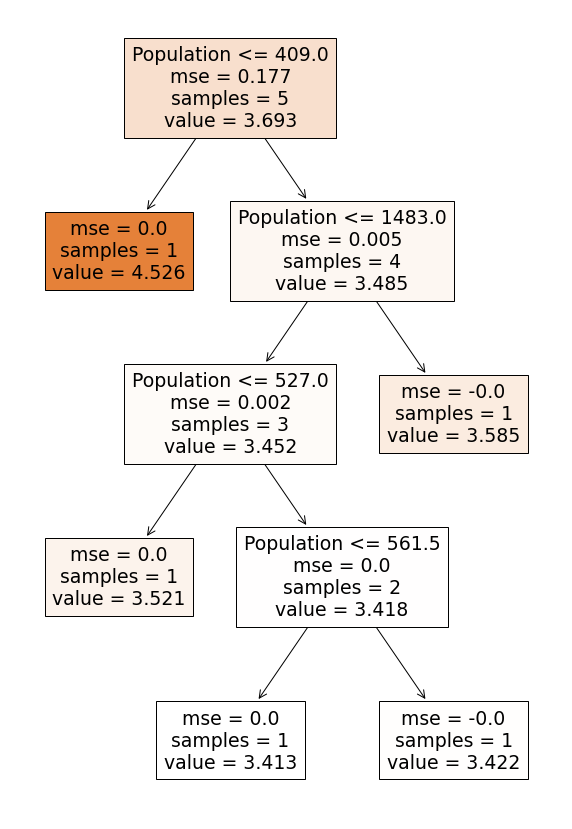

In [12]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 15))
plot_tree(tree, feature_names=features, filled=True);

In [13]:
y

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [14]:
import numpy as np


def mse(true, pred):
    return np.mean(np.square(true - pred))

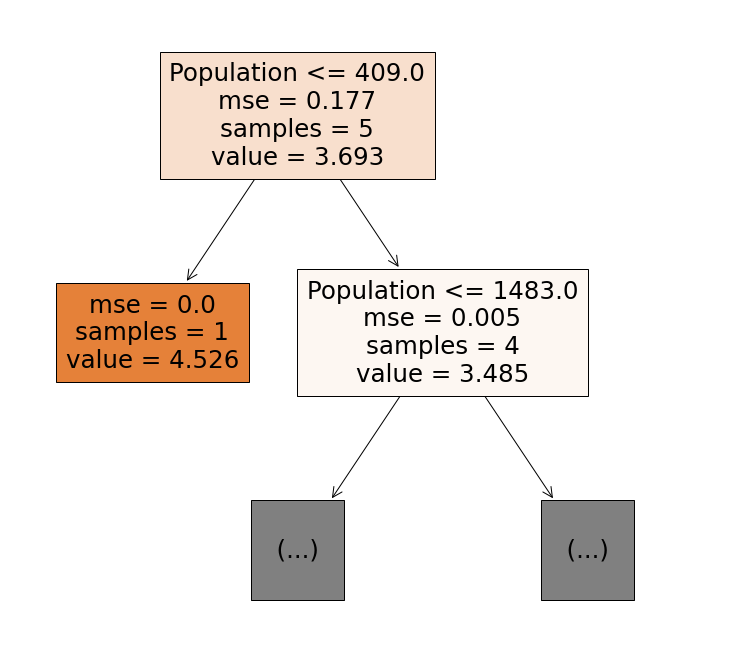

In [15]:
plt.figure(figsize=(13, 12))
plot_tree(tree, feature_names=features, filled = True, max_depth=1);

In [16]:
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [17]:
df[df.Population <= 409]

,HouseAge,Population,target
0,41.0,322.0,4.526


In [18]:
df[~(df.Population <= 409)]

,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [19]:
print(f"Среднее предсказание в корневом узле равно {df['target'].mean()}")

Среднее предсказание в корневом узле равно 3.6934000000000005


In [20]:
mse_root = mse(df['target'], df['target'].mean())
print(f"Среднеквадратичная ошибка в корневом узле равна {mse_root}")

Среднеквадратичная ошибка в корневом узле равна 0.17739543999999993


In [21]:
df_left = df[df.Population <= 409]
df_left

,HouseAge,Population,target
0,41.0,322.0,4.526


In [22]:
print(f"Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно {df_left['target'].mean()}")

mse_left = mse(df_left['target'], df_left['target'].mean())
print(f"Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна {mse_left}")

Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно 4.526
Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна 0.0


In [23]:
df_right = df[~(df.Population <= 409)]
df_right

,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [24]:
print(f"Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно {df_right['target'].mean()}")

mse_right = mse(df_right['target'], df_right['target'].mean())
print(f"Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна {mse_right}")

Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно 3.48525
Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна 0.005112187499999999


In [25]:
n_left = df_left.shape[0]
n_right = df_right.shape[0]
n = df.shape[0]

ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
ig

0.17330568999999993

In [26]:
df[df.HouseAge <= 50]

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585


In [27]:
df[~(df.HouseAge <= 50)]

,HouseAge,Population,target
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [28]:
print(f"Среднее предсказание в корневом узле равно {df['target'].mean()}")

Среднее предсказание в корневом узле равно 3.6934000000000005


In [29]:
mse_root = mse(df['target'], df['target'].mean())
print(f"Среднеквадратичная ошибка в корневом узле равна {mse_root}")

Среднеквадратичная ошибка в корневом узле равна 0.17739543999999993


In [30]:
df_left = df[df.HouseAge <= 50]
df_left

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585


In [31]:
print(f"Среднее предсказание в левой подвыборке после вопроса HouseAge <= 50 равно {df_left['target'].mean()}")

mse_left = mse(df_left['target'], df_left['target'].mean())
print(f"Среднеквадратичная ошибка в левой подвыборке после вопроса HouseAge <= 50 равна {mse_left}")

Среднее предсказание в левой подвыборке после вопроса HouseAge <= 50 равно 4.0555
Среднеквадратичная ошибка в левой подвыборке после вопроса HouseAge <= 50 равна 0.22137024999999994


In [32]:
df_right = df[~(df.HouseAge <= 50)]
df_right

,HouseAge,Population,target
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [33]:
print(f"Среднее предсказание в правой подвыборке после вопроса HouseAge <= 50 равно {df_right['target'].mean()}")

mse_right = mse(df_right['target'], df_right['target'].mean())
print(f"Среднеквадратичная ошибка в правой подвыборке после вопроса HouseAge <= 50 равна {mse_right}")

Среднее предсказание в правой подвыборке после вопроса HouseAge <= 50 равно 3.452
Среднеквадратичная ошибка в правой подвыборке после вопроса HouseAge <= 50 равна 0.0023939999999999977


In [34]:
n_left = df_left.shape[0]
n_right = df_right.shape[0]
n = df.shape[0]

ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
ig

0.08741093999999995

In [35]:
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [36]:
split_values = sorted(df.HouseAge.unique())
split_values

[21.0, 41.0, 52.0]

In [37]:
display(df[(df['HouseAge'] <= 21)], df[~(df['HouseAge'] <= 21)])

,HouseAge,Population,target
1,21.0,2401.0,3.585


,HouseAge,Population,target
0,41.0,322.0,4.526
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [38]:
display(df[(df['HouseAge'] <= 41)], df[~(df['HouseAge'] <= 41)])

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585


,HouseAge,Population,target
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [39]:
display(df[(df['HouseAge'] <= 52)], df[~(df['HouseAge'] <= 52)])

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


,HouseAge,Population,target


In [40]:
def get_information_gain(df, feature, split):
    df_left, df_right = df[(df[feature] <= split)], df[~(df[feature] <= split)]

    n_left = df_left.shape[0]
    n_right = df_right.shape[0]
    n = df.shape[0]

    mse_root = mse(df['target'], df['target'].mean())
    mse_left = mse(df_left['target'], df_left['target'].mean())
    mse_right = mse(df_right['target'], df_right['target'].mean())

    ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
    print(f'Прирост информации при вопросе {feature} <= {split} равен {ig}')
    return ig

In [41]:
information_gains = {}

In [42]:
feature = 'HouseAge'
for split in split_values[:-1]:
    information_gains[f'{feature} <= {split}'] = get_information_gain(df, feature, split)

Прирост информации при вопросе HouseAge <= 21.0 равен 0.0029376399999999636
Прирост информации при вопросе HouseAge <= 41.0 равен 0.08741093999999995


In [43]:
split_values = sorted(df.Population.unique())
split_values

[322.0, 496.0, 558.0, 565.0, 2401.0]

In [44]:
feature = 'Population'
for split in split_values[:-1]:
    information_gains[f'{feature} <= {split}'] = get_information_gain(df, feature, split)

Прирост информации при вопросе Population <= 322.0 равен 0.17330568999999993
Прирост информации при вопросе Population <= 496.0 равен 0.07264400666666662
Прирост информации при вопросе Population <= 558.0 равен 0.024041339999999994
Прирост информации при вопросе Population <= 565.0 равен 0.0029376399999999636


In [45]:
max(information_gains, key=information_gains.get)

'Population <= 322.0'

In [46]:
display(df[(df['Population'] <= 409)], df[~(df['Population'] <= 409)])

,HouseAge,Population,target
0,41.0,322.0,4.526


,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [47]:
display(df[(df['Population'] <= 322)], df[~(df['Population'] <= 322)])

,HouseAge,Population,target
0,41.0,322.0,4.526


,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422
